In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [4]:
range(-9,11)

[-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Label 33 Parameters 20


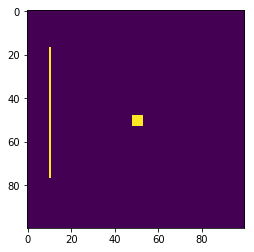

In [3]:
# vary origin
sparse, image, label, parameters = C.Figure1.position_non_aligned_scale(pre_offset=3)
print 'Label', label, 'Parameters', parameters
imshow(image)

Label 40 Parameters 10


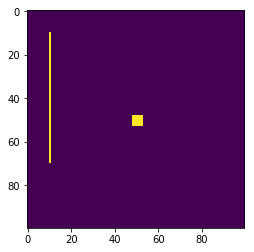

In [44]:
# vary origin
sparse, image, label, parameters = C.Figure1.position_non_aligned_scale(pre_offset=10)
print 'Label', label, 'Parameters', parameters
imshow(image)

In [24]:

  
print global_min, global_max

31 40


In [18]:
DATATYPE = C.Figure1.position_non_aligned_scale
FLAGS = [False]*10
NOISE = True

#
# DATA GENERATION
#
#
train_target = 60000
val_target = 20000
test_target = 20000

# get global min and max
global_min = np.inf
global_max = -np.inf
for N in range(train_target+val_target+test_target):
  
  sparse, image, label, parameters = DATATYPE(FLAGS)
  
  global_min = min(label, global_min)
  global_max = max(label, global_max)
# end of global min max


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target), dtype=np.float32)
train_counter = 0

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target), dtype=np.float32)
val_counter = 0

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target), dtype=np.float32)
test_counter = 0

t0 = time.time()

min_label = np.inf
max_label = -np.inf

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  sparse, image, label, parameters = DATATYPE(FLAGS)
  
  # if label == 0:
  #   break
  
  # we need float
  image = image.astype(np.float32)
  
  pot = np.random.choice(3)#, p=([.6,.2,.2]))
  
  #
  #
  # special: to allow normalizations, we make sure the global min
  # and the global max for sure go into pot 0
  # this biases in a very slight way towards the mean with 2/n
  # this is ok.
  #
  if label == global_min or label == global_max:
    pot = 0 # for sure training
  
  if pot == 0 and train_counter < train_target:
    # a training candidate
    if label in y_val or label in y_test:
      # no thank you
      continue
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:
    # a validation candidate
    if label in y_train or label in y_test:
      # no thank you
      continue
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to validation
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
  
  elif pot == 2 and test_counter < test_target:
    # a test candidate
    if label in y_train or label in y_val:
      # no thank you
      continue
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to test
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
  
print 'Done', time.time()-t0, 'seconds (', all_counter, 'iterations)'

Done 37.6531250477 seconds ( 297275 iterations)


In [19]:
X_train.min(), X_train.max(), np.unique(y_train)

(3.5630127e-11,
 1.05,
 array([ 21.,  27.,  31.,  33.,  34.,  38.,  39.,  40.], dtype=float32))

In [20]:
X_val.min(), X_val.max(), np.unique(y_val)

(4.4276784e-11, 1.05, array([ 25.,  26.,  28.,  32.,  36.], dtype=float32))

In [21]:
X_test.min(), X_test.max(), np.unique(y_test)

(2.1008036e-10,
 1.05,
 array([ 22.,  23.,  24.,  29.,  30.,  35.,  37.], dtype=float32))

In [22]:
X_min = X_train.min()
X_max = X_train.max()
y_min = y_train.min()
y_max = y_train.max()

new_y_test = y_test.copy()
new_y_test -= y_min
new_y_test /= (y_max - y_min)
print new_y_test.min(), new_y_test.max()

0.0526316 0.842105


In [16]:
31 - 35


-4

In [19]:
-4 / 5.

-0.8